In [90]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

In [91]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [92]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [93]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results


y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


In [94]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="sigmoid"),
    ]
)

In [95]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)


In [96]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [97]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val),
)

# print(model.evaluate(x_test, y_test))

Epoch 1/9


2023-04-15 22:46:16.413117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 25ms/step - loss: 2.4500 - accuracy: 0.5376 - val_loss: 1.6411 - val_accuracy: 0.6460
Epoch 2/9
11/16 [===================>..........] - ETA: 0s - loss: 1.3757 - accuracy: 0.7074

2023-04-15 22:46:16.944938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 14ms/step - loss: 1.3511 - accuracy: 0.7106 - val_loss: 1.2799 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0055 - accuracy: 0.7810 - val_loss: 1.1269 - val_accuracy: 0.7570
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.7899 - accuracy: 0.8296 - val_loss: 1.0247 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.6321 - accuracy: 0.8652 - val_loss: 0.9762 - val_accuracy: 0.8030
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 0.5053 - accuracy: 0.8941 - val_loss: 0.9344 - val_accuracy: 0.8020
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4057 - accuracy: 0.9144 - val_loss: 0.9576 - val_accuracy: 0.8040
Epoch 8/9
16/16 [==============================] - 0s 12ms/step - loss: 0.3306 - accuracy: 0.9307 - val_loss: 0.9249 - val_accuracy: 0.8150
Epoch 9/9
16/16 [=============

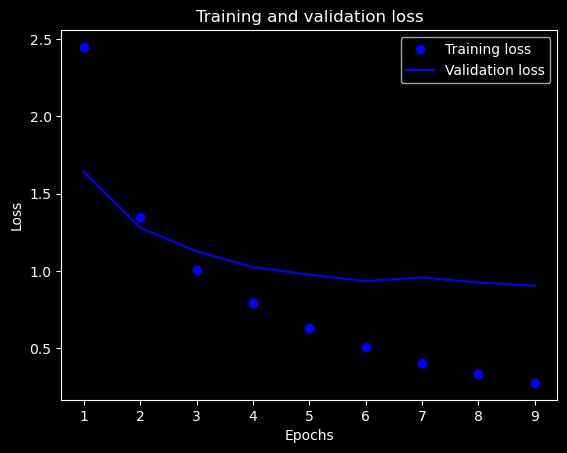

In [98]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

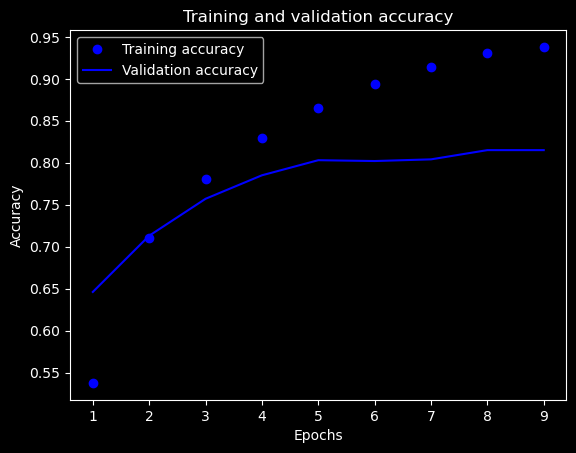

In [99]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()